<h3> Pre processing Steps </h3>

1. Load the dataset
2. Check for null values
3. See if the dataset is balanced or not
4. Check for any duplicate rows
5. Remove the duplicate rows

<h6> Importing the libraries needed for EDA </h6>

In [261]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<h6>Load haberman.csv into a pandas dataFrame</h6> 

Since the dataset is a csv file, use the read_csv() method of the Pandas library.

In [262]:
haberman = pd.read_csv('haberman.csv')

<h6>Find out the total number of datapoints and features in the dataset</h6>

In [263]:
print(haberman.shape)

(306, 4)


<h6> Check for null values</h6>

In [264]:
haberman.isnull().values.any()

False

Haberman dataset has no missing values.

<h6> Find for any duplicate rows</h6>

In [265]:
subset = haberman[haberman.duplicated()]
subset

,age,year,nodes,status
23,37,63,0,1
27,38,60,0,1
52,41,65,0,1
65,43,64,0,2
78,44,61,0,1
108,48,58,11,2
132,50,61,0,1
179,54,62,0,1
184,55,58,1,1
196,56,60,0,1


<h6> Drop duplicates </h6>

In [266]:
haberman = haberman.drop_duplicates()
haberman.shape # This gives the total number of rows of the revised dataset after preprocessing steps. 

(289, 4)

<h3> Understanding the dataset</h3>

1. Retrieve the column name and understand the meaning of each column.
2. Understand the end goal.
3. Seek background knowledge if required.
4. Try to find out if it is a Classification task or a Regression task.

Haberman dataset has data points from a study that was conducted from 1958 to 1970 on survival rate of the patients who had undergone surgery for breast cancer.

<u>Features of Haberman dataset</u>:

1. age: This tells us the age of the patient at the time of operation.

2. year: This tells us the year in which patient had an operation.

3. nodes: They are also known as Auxiliary lymph nodes whose function is to filter fluids before they are eventually released into the bloodstream. Having cancer cells in Nodes tells us that the cancer might have spread to other parts of body as well.

4. status: Label Feature has value of 1,2 where 2 corresponds to the patient who survived for less than 5 years and 1 corresponds to patient who survived more than 5 years post operation.



<h6> Summary of the dataset </h6>

In [267]:
haberman.describe()

,age,year,nodes,status
count,289.000000,289.000000,289.000000,289.000000
mean,52.422145,62.906574,4.221453,1.273356
std,10.876915,3.275794,7.325239,0.446455
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.000000,66.000000,5.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


This way we can understand all the statistical details about the dataset like <b>max, min, mean, std-dev, count, percentiles</b>.

<h6> Inspecting the dataset</h6>

To find everything about the dataset you can use the info() method. This gives a detailed overview of the dataset with the total number of rows and columns, column names, index range, type of values in the columns and also specifies if any of the columns have null values.

In [268]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     289 non-null    int64
 1   year    289 non-null    int64
 2   nodes   289 non-null    int64
 3   status  289 non-null    int64
dtypes: int64(4)
memory usage: 11.3 KB


- Since there are no null values in the dataset, there is no need for imputation. 

Here we get to know that this dataset has 4 columns. But there is another way to know the columns in the dataset.

<h6>Find out the names of the colunms of the dataset</h6>

In [269]:
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

<h6>Display the top 3 rows of the dataset</h6>

In [270]:
haberman.head(3) # Default parameter to the head() function is 5

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1


<h6> Find out the unique values of the 'status' column</h6>

In [271]:
haberman['status'].unique()

array([1, 2], dtype=int64)

<h6>Distribution of classes in the dataset</h6>

In [272]:
haberman['status'].value_counts()

1    210
2     79
Name: status, dtype: int64

This shows that Haberman dataset is an imbalanced dataset.

<h6>Distribution of class labels as percentages</h6>

In [273]:
haberman['status'].value_counts(1)

1    0.726644
2    0.273356
Name: status, dtype: float64

<h6><u>Observation</u>:</h6>

- The 'status' column is an integer value that needs to be converted into categorical values like "Survived more than 5 years" and "Survived less than 5 years". These categorical values gives us better understanding about the dataset.

In [274]:
haberman['status'].replace({1: "Survived more than 5 years", 2: "Survived less than 5 years"})

0      Survived more than 5 years
1      Survived more than 5 years
2      Survived more than 5 years
3      Survived more than 5 years
4      Survived more than 5 years
                  ...            
301    Survived more than 5 years
302    Survived more than 5 years
303    Survived more than 5 years
304    Survived less than 5 years
305    Survived less than 5 years
Name: status, Length: 289, dtype: object

<b>OR</b>

In [275]:
haberman.loc[haberman['status'] == 1, 'status'] = "Survived more than 5 years"
haberman.loc[haberman['status'] == 2, 'status'] = "Survived less than 5 years"
haberman

,age,year,nodes,status
0,30,64,1,Survived more than 5 years
1,30,62,3,Survived more than 5 years
2,30,65,0,Survived more than 5 years
3,31,59,2,Survived more than 5 years
4,31,65,4,Survived more than 5 years
...,...,...,...,...
301,75,62,1,Survived more than 5 years
302,76,67,0,Survived more than 5 years
303,77,65,3,Survived more than 5 years
304,78,65,1,Survived less than 5 years


<h6>Rename the column names of the dataset</h6>

We can rename the names of the columns to make the dataset more meaningful and comprehensible.

In [276]:
haberman_columns = haberman.rename(columns = {'age': 'Age', 'year': 'Year', 'nodes': 'Auxiliary_Lymph_Nodes', 'status': 'Survival_Status'})
print(haberman_columns)

     Age  Year  Auxiliary_Lymph_Nodes             Survival_Status
0     30    64                      1  Survived more than 5 years
1     30    62                      3  Survived more than 5 years
2     30    65                      0  Survived more than 5 years
3     31    59                      2  Survived more than 5 years
4     31    65                      4  Survived more than 5 years
..   ...   ...                    ...                         ...
301   75    62                      1  Survived more than 5 years
302   76    67                      0  Survived more than 5 years
303   77    65                      3  Survived more than 5 years
304   78    65                      1  Survived less than 5 years
305   83    58                      2  Survived less than 5 years

[289 rows x 4 columns]


<h3> Exploratory Data Analysis</h3>

1. Univariate analysis - PDF, CDF, Boxplot, ViolinPlot
2. Bivariate Analysis - Pair Plot, Scatter Plot
3. Multivariate Analysis - Contours

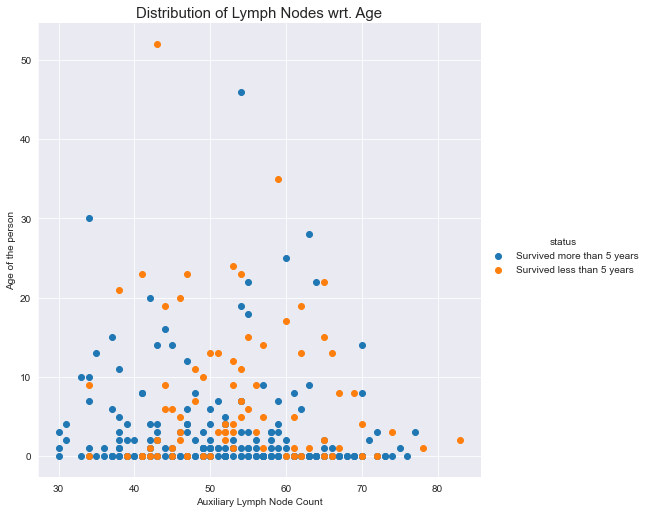

In [292]:
sns.set_style("darkgrid")
sns.FacetGrid(haberman, hue = "status", height = 7)\
.map(plt.scatter, "age", "nodes")\
.add_legend()

plt.xlabel('Auxiliary Lymph Node Count')
plt.ylabel('Age of the person')

plt.title('Distribution of Lymph Nodes wrt. Age', size = 15)

plt.show()

<h6><u>Observation</u>:</h6>

- Maximum patients have less than 10 nodes.
- Patients having ages between 40 and 60 have higher number of nodes.

<i><u>Note</u></i>: Higher number of Auxiliary Lymph nodes indicate cancer being spread to other parts of the body

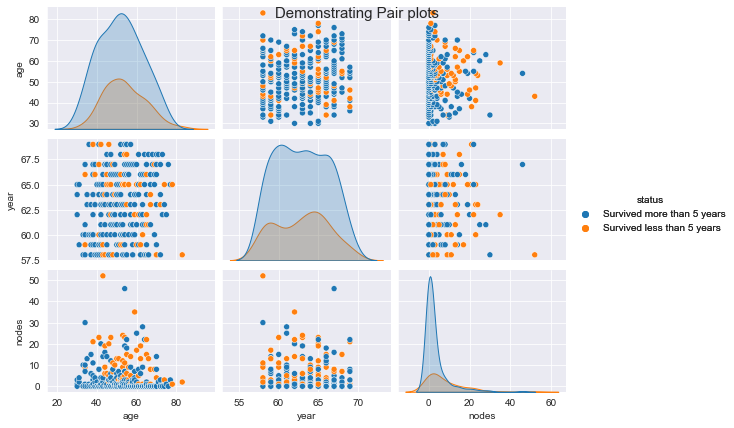

In [278]:
sns.set_style("darkgrid")
sns.pairplot(haberman, hue = 'status', diag_kind = 'kde', height = 2).add_legend()

plt.suptitle('Demonstrating Pair plots', size = 15)

plt.show()

- Pair plots are useful for exploring datasets where we have less number of features they give us insights to the underlying datasets by plotting features against one anaother in pairs.

- We get 9 pair plots out of which Plots 2,3,6 and Plots 4,7,8 are same plots with their axes swapped so we can consider anyone from the two groups and it will give the same insights.

- The diagonal pair plots show the PDFs of the each feature in the dataset.

<h6>1-D scatter plot</h6>

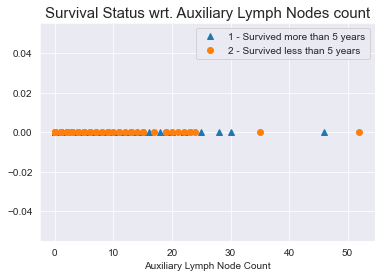

In [279]:
import numpy as np

survived_longer = haberman.loc[haberman["status"] == "Survived more than 5 years"]
survived_less = haberman.loc[haberman["status"] == "Survived less than 5 years"]

plt.plot(survived_longer["nodes"],np.zeros_like(survived_longer["nodes"]),'^')

plt.plot(survived_less["nodes"],np.zeros_like(survived_less["nodes"]),'o')

plt.xlabel('Auxiliary Lymph Node Count')

plt.legend(["1 - Survived more than 5 years","2 - Survived less than 5 years"])

plt.title('Survival Status wrt. Auxiliary Lymph Nodes count', size = 15)

plt.show()

The values of 1-D scatter plot are highly overlapping on top of each other, so we cannot gather any meaningful information. 

Let's understand the dataset with Histograms which is a variation of 1-D scatter plot.

<h4>Histogram</h4>
Histogram gives an idea of how many points exist for a feature on x-axis.

<h6> Plot the histogram of the class label - 'status'</h6>

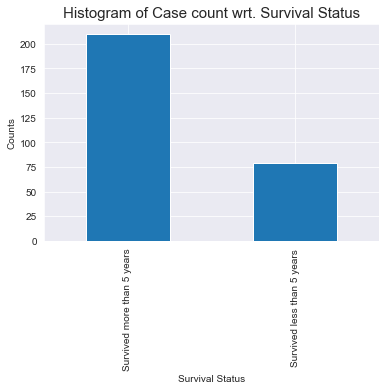

In [293]:
count_classes = pd.value_counts(haberman['status'])
count_classes.plot(kind = 'bar')

plt.xlabel('Survival Status')
plt.ylabel('Counts')

plt.title('Histogram of Case count wrt. Survival Status', size = 15)

plt.show()

<h4>Probability Density Function(PDF)</h4>
<ul>
    <li>Probability Density Function is a smoothened form of histogram.</li>
    <li>In a histogram we have the feature we are interested in on the x axis and the count of that feature on the y axis.</li>
</ul>

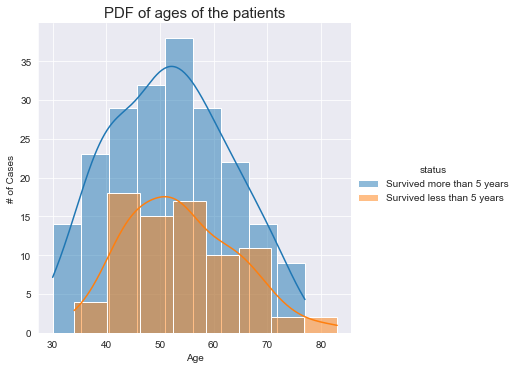

In [281]:
sns.FacetGrid(haberman, hue ="status", height = 5)\
    .map(sns.histplot, "age", kde = True) \
    .add_legend()

plt.xlabel('Age')
plt.ylabel('# of Cases')

plt.title('PDF of ages of the patients', size = 15)

plt.show();

<b><u><i>Observation</i></u></b>:
- The minimum age of patient is 30.
- The maximum age of patient is slightly greater than 80.
- The median age of patient is around 52.
- The age group between 40 to 75 have nearly the same survival and death status so we cannot do further analysis using this feature.

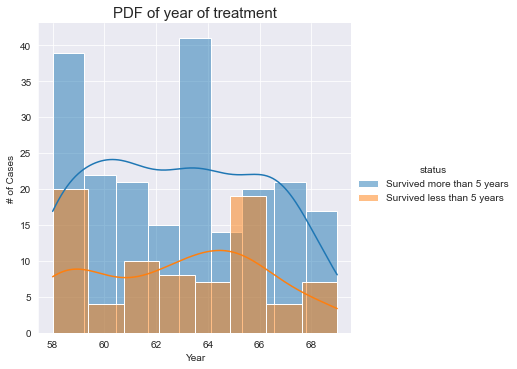

In [282]:
sns.FacetGrid(haberman, hue ="status", height = 5)\
    .map(sns.histplot, "year", kde = True) \
    .add_legend()

plt.xlabel('Year')
plt.ylabel('# of Cases')

plt.title('PDF of year of treatment', size = 15)
    
plt.show();

In [283]:
year_group = haberman.groupby('year')
year_group

In [284]:
for year, status_df in year_group:
    print(year)
    print(status_df)

58
     age  year  nodes                      status
5     33    58     10  Survived more than 5 years
9     34    58     30  Survived more than 5 years
20    37    58      0  Survived more than 5 years
37    39    58      0  Survived more than 5 years
40    40    58      2  Survived more than 5 years
41    40    58      0  Survived more than 5 years
46    41    58      0  Survived more than 5 years
55    42    58      0  Survived more than 5 years
62    43    58     52  Survived less than 5 years
74    44    58      9  Survived less than 5 years
89    46    58      2  Survived less than 5 years
94    46    58      3  Survived more than 5 years
103   47    58      3  Survived more than 5 years
107   48    58     11  Survived less than 5 years
130   50    58      1  Survived more than 5 years
156   53    58      4  Survived less than 5 years
162   53    58      1  Survived more than 5 years
178   54    58      1  Survived more than 5 years
182   55    58      1  Survived more than 5 yea

<b><u><i>Observation</i></u></b>:
- A good number of cases survived in the year 1958 and 1964.
- But this curve has a uniform density and doesn't gives any insight so we cannot use it for further analysis.

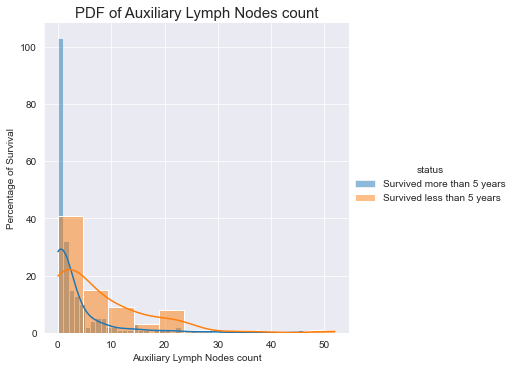

In [294]:
sns.FacetGrid(haberman, hue ="status", height = 5)\
    .map(sns.histplot, "nodes", kde = True) \
    .add_legend()

plt.xlabel('Auxiliary Lymph Nodes count')
plt.ylabel('Percentage of Survival')

plt.title('PDF of Auxiliary Lymph Nodes count', size = 15)

plt.show();

<b><u><i>Observation</i></u></b>:
- If the number of nodes is 0 then patient survives more than 5 years.
- If the number of nodes is less than or equal to 3 the patient has a high chance of survival of more than 5 years.

Let's use CDF to find the exact percentage of people who will survive and who will not

<h4>Cumulative Distribution Function(CDF)</h4>

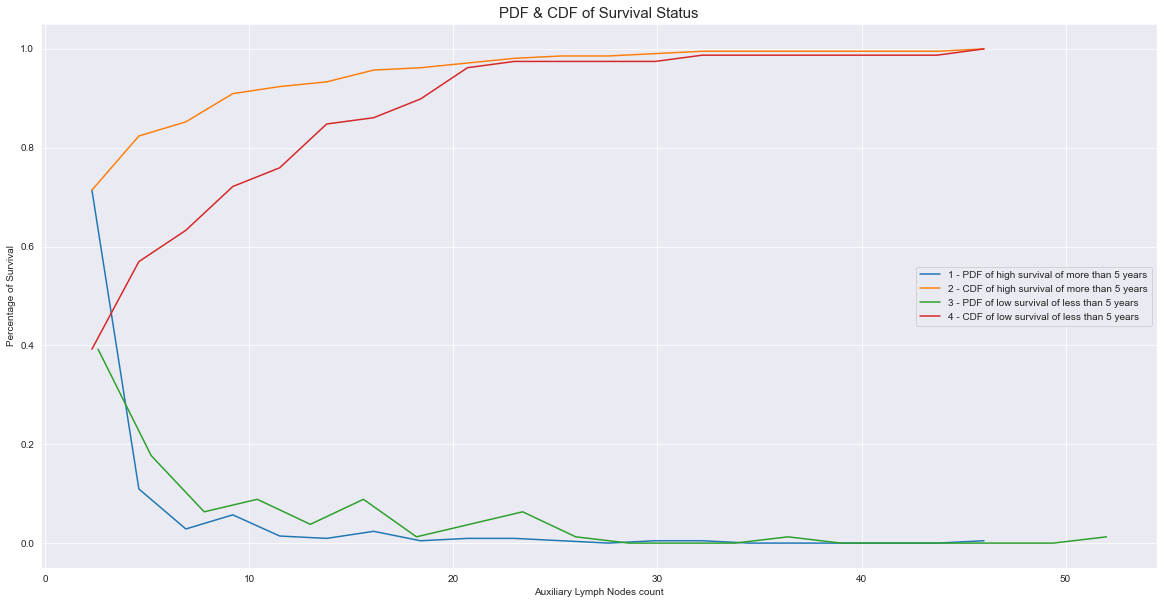

In [286]:
import numpy as np
olderr = np.seterr(all='ignore')

counts, bin_edges = np.histogram(survived_longer['nodes'], bins = 20, density = True)
count1, bins1 = np.histogram(survived_low['nodes'], bins = 20, density = True)

pdf = counts / sum(counts)
pdf_low = count1 / sum(count1)

plt.figure(figsize = (20,10))

cdf = np.cumsum(pdf)
cdf_low = np.cumsum(pdf_low)

plt.plot(bin_edges[1:],pdf) # PDF of high survival
plt.plot(bin_edges[1:],cdf) # CDF of high survival


plt.plot(bins1[1:],pdf_low) # PDF of low survival
plt.plot(bin_edges[1:],cdf_low) # CDF of low survival

plt.xlabel('Auxiliary Lymph Nodes count')
plt.ylabel('Percentage of Survival')

plt.title('PDF & CDF of Survival Status', size = 15)

plt.legend(["1 - PDF of high survival of more than 5 years",\
            "2 - CDF of high survival of more than 5 years",\
            "3 - PDF of low survival of less than 5 years",\
            "4 - CDF of low survival of less than 5 years"])
plt.show()

<b><u><i>Observation</i></u></b>:

- There is nearly 73% chance of high survival of more than 5 years if the number of nodes detected is less than 3.
- There is 100% chance of low survival if the number of nodes is greater than 45.
- 38% of the people having less than 5 nodes have low chances of survival of less than 5 years.

<h4>Mean and Standard Deviation</h4>

In [287]:
print("Mean of number of nodes for people who survived more than 5 years is {}".format(np.mean(survived_longer.nodes)))
print("STD of number of nodes for people who survived more than 5 years is {}".format(np.std(survived_longer.nodes)))
print("Mean of number of nodes for people who survived more than 5 years with a outlier introduced is {}"\
      .format(np.mean(np.append(survived_longer.nodes,70))))

print()

print("Mean of number of nodes for people who survived less than 5 years is {}".format(np.mean(survived_low.nodes)))
print("STD of number of nodes for people who survived less than 5 years is {}".format(np.std(survived_low.nodes)))
print("Mean of number of nodes for people who survived less than 5 years with a outlier introduced is {}"\
      .format(np.mean(np.append(survived_low.nodes,70))))

Mean of number of nodes for people who survived more than 5 years is 2.9857142857142858
STD of number of nodes for people who survived more than 5 years is 6.015439319291787
Mean of number of nodes for people who survived more than 5 years with a outlier introduced is 3.3033175355450237

Mean of number of nodes for people who survived less than 5 years is 7.506329113924051
STD of number of nodes for people who survived less than 5 years is 9.196688200997547
Mean of number of nodes for people who survived less than 5 years with a outlier introduced is 8.2875


<b><u><i>Observation</i></u></b>:

- The spread of data in number of people who survived more than 5 years is less than the number of people who survived less than 5 years

- The mean of number of nodes for people who survived more than 5 years is low whereas the mean of number of nodes for people who survived more than 5 years is high.

- Both the means change significantly when an outlier is introduced.

In [288]:
print("Median of number of nodes for people who survived more than 5 years is {}".format(np.median(survived_longer.nodes)))
print("Median of number of nodes for people who survived more than 5 years with a outlier introduced is {}"\
      .format(np.median(np.append(survived_longer.nodes,70))))

print("Median of number of nodes for people who survived less than 5 years is {}".format(np.median(survived_low.nodes)))
print("Median of number of nodes for people who survived less than 5 years with a outlier introduced is {}"\
      .format(np.median(np.append(survived_low.nodes,70))))

Median of number of nodes for people who survived more than 5 years is 1.0
Median of number of nodes for people who survived more than 5 years with a outlier introduced is 1.0
Median of number of nodes for people who survived less than 5 years is 4.0
Median of number of nodes for people who survived less than 5 years with a outlier introduced is 4.0


<b><u><i>Observation</i></u></b>:

- The median for patients who survived longer is 1 and for those who survived low is 4.
- The medians do not change even after adding an outlier.

In [289]:
print("Percentiles of long survival are ",format(np.percentile(survived_longer.nodes,np.arange(0,100,25))))
print("Percentiles of low survival are ",format(np.percentile(survived_low.nodes,np.arange(0,100,25))))
print("90th percentile for long survival is",format(np.percentile(survived_longer.nodes,90)))
print("90th percentile for low survival is",format(np.percentile(survived_low.nodes,90)))

Percentiles of long survival are  [0. 0. 1. 3.]
Percentiles of low survival are  [ 0.   1.   4.  11.5]
90th percentile for long survival is 8.099999999999994
90th percentile for low survival is 20.200000000000003


<b><u><i>Observation</i></u></b>:

- Nearly 50th% of nodes in long survival cases are 1 and 75th% is more than 3 indicating that remanining the 25th% have more than 3 Auxiliary nodes.
- 75th% of data in low survival cases have 11 nodes detected.
- At 90th% if the number of nodes detected is more than > 8 then there is a high survival chance and if the number of nodes detected is > 20 then there is a low survival chance.

<h4>Box plots</h4>

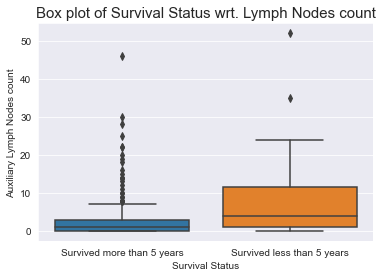

In [314]:
sns.boxplot(x = "status", y = "nodes", data = haberman)

plt.xlabel('Survival Status')
plt.ylabel('Auxiliary Lymph Nodes count')

plt.title('Box plot of Survival Status wrt. Lymph Nodes count', size = 15)

plt.show()

<b><u><i>Observation</i></u></b>:

- Threshold for long survival is from 0 to 8.
- Threshold for low survival is from 0 to 25.

<h4>Violin plots</h4>

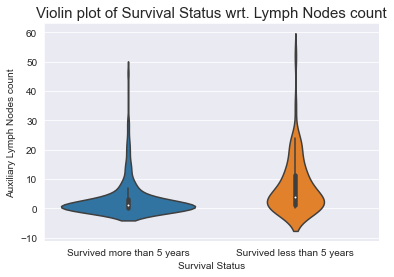

In [315]:
sns.violinplot(x = "status", y = "nodes", data = haberman, size = 8)
plt.xlabel('Survival Status')
plt.ylabel('Auxiliary Lymph Nodes count')

plt.title('Violin plot of Survival Status wrt. Lymph Nodes count', size = 15)

plt.show()

<b><u><i>Observation</i></u></b>:

- The spread of points in long survival is more near 0 and that of low survival is more near 2.
- The whiskers of long survival extend from 0 to 7 and that of low survival extend from 0 to 25.